<a href="https://colab.research.google.com/github/youhangkai/SHARING/blob/main/Madison_GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netCDF4 numpy
!pip install pyproj
!pip install cartopy
import netCDF4 as nc
from google.cloud import storage
import netCDF4 as nc
import numpy as np
from pyproj import Proj, transform
import xarray as xr
import matplotlib.pyplot as plt
from PIL import Image
import imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0, but you have fsspec 2023.12.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.8 MB/s eta 0:00:00


In [2]:
import ee
import geemap

# Initialize the map
figure1 = geemap.Map()

# Add a basemap
figure1.add_basemap('OpenTopoMap')

# Define the geometry for Madison, Wisconsin
# Using a rough bounding box around Madison for demonstration
madison = ee.Geometry.Polygon(
    [
        [
            [-89.5735, 42.9634],  # Top Left
            [-89.5735, 43.1655],  # Bottom Left
            [-89.2262, 43.1655],  # Bottom Right
            [-89.2262, 42.9634],  # Top Right
            [-89.5735, 42.9634]   # Back to Top Left
        ]
    ],
    None,
    False,
)

# Add the new layer
figure1.addLayer(madison, {}, "Madison, Wisconsin")

# Center the map on the new geometry
figure1.centerObject(madison, 10)

figure1

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=K-I8qJoDF3FYfh9KSSCI8kqrhrkbF9SVaGYMad9TflM&tc=0uBmlyOYioZMy4xihSpcL4WhcmudK_62VceekoII_aQ&cc=z23NYwsUTlKhsiHK6J5J3jlFrcEczHe16RM2MKWGJys

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXkMmGhVI8w9_gcV7usOOwyXzQZyjPTFg5DuebTVLjm3nOUgg5toFTc

Successfully saved authorization token.


Map(center=[43.06443823708751, -89.39985000000006], controls=(WidgetControl(options=['position', 'transparent_…

In [31]:
import ee
import geemap
import datetime

madison = ee.Geometry.Polygon(
    [
        [
            [-89.5735, 42.9634],  # Top Left
            [-89.5735, 43.1655],  # Bottom Left
            [-89.2262, 43.1655],  # Bottom Right
            [-89.2262, 42.9634],  # Top Right
            [-89.5735, 42.9634]   # Back to Top Left
        ]
    ]
)

# Load the MODIS dataset
modis = ee.ImageCollection("MODIS/006/MOD13Q1")

# Filter the dataset for the desired time period and area
start_date = '2022-01-01'
end_date = '2022-12-31'
modis_filtered = modis.filterDate(start_date, end_date).filterBounds(madison)

# Visualization parameters for NDVI
vis_params_ndvi = {
    'min': -2000,
    'max': 8000,
    'palette': [
        'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ]
}


# Create a map for NDVI
map_NDVI = geemap.Map()
map_NDVI.centerObject(madison, 10)
ndvi_layer = modis_filtered.select('NDVI').mean() # Select NDVI band and compute mean
map_NDVI.addLayer(ndvi_layer, vis_params_ndvi, "NDVI")
map_NDVI





Map(center=[43.064525750462586, -89.39985000000006], controls=(WidgetControl(options=['position', 'transparent…

In [32]:
# Visualization parameters for EVI
vis_params_evi = {
    'min': -2000,
    'max': 8000,
    'palette': [
        'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ]
}

# Create a map for EVI
map_EVI = geemap.Map()
map_EVI.centerObject(madison, 10)
evi_layer = modis_filtered.select('EVI').mean() # Select EVI band and compute mean
map_EVI.addLayer(evi_layer, vis_params_evi, "EVI")
map_EVI

Map(center=[43.064525750462586, -89.39985000000006], controls=(WidgetControl(options=['position', 'transparent…

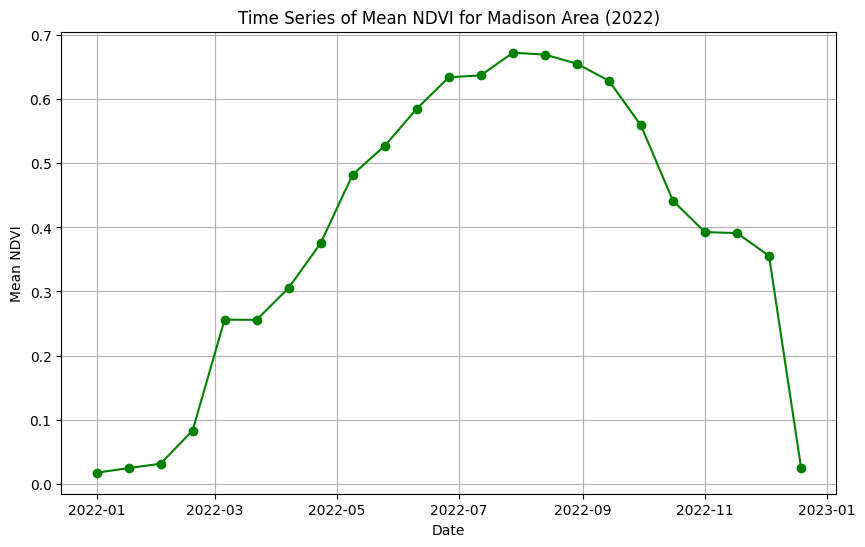

In [36]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Earth Engine
ee.Initialize()

# Define the Area of Interest (Madison, Wisconsin)
madison = ee.Geometry.Polygon(
    [
        [
            [-89.5735, 42.9634],  # Top Left
            [-89.5735, 43.1655],  # Bottom Left
            [-89.2262, 43.1655],  # Bottom Right
            [-89.2262, 42.9634],  # Top Right
            [-89.5735, 42.9634]   # Back to Top Left
        ]
    ]
)

# Load the MODIS dataset and select the NDVI band
modis = ee.ImageCollection("MODIS/006/MOD13Q1").select('NDVI')

# Filter the dataset for the desired time period
start_date = '2022-01-01'
end_date = '2022-12-31'
modis_filtered = modis.filterDate(start_date, end_date).filterBounds(madison)

# Function to calculate mean NDVI for an image
def mean_ndvi(image):
    mean = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=madison,
        scale=500  # Scale in meters; adjust as necessary
    )
    return image.set('date', image.date().format()).set('mean_ndvi', mean.get('NDVI'))

# Apply the mean NDVI function to each image in the collection
modis_time_series = modis_filtered.map(mean_ndvi)

# Extract the data
nested_list = modis_time_series.reduceColumns(
    ee.Reducer.toList(2),
    ['date', 'mean_ndvi']
).get('list').getInfo()

# Convert to a pandas DataFrame
df = pd.DataFrame(nested_list, columns=['date', 'mean_ndvi'])
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], 0.0001*df['mean_ndvi'], marker='o', color='green')
plt.title('Time Series of Mean NDVI for Madison Area (2022)')
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.grid(True)
plt.show()

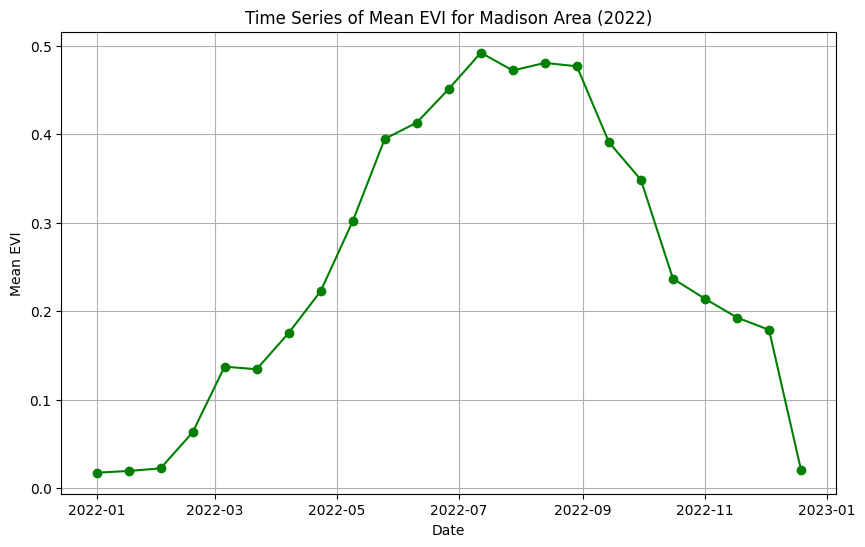

In [37]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Earth Engine
ee.Initialize()

# Define the Area of Interest (Madison, Wisconsin)
madison = ee.Geometry.Polygon(
    [
        [
            [-89.5735, 42.9634],  # Top Left
            [-89.5735, 43.1655],  # Bottom Left
            [-89.2262, 43.1655],  # Bottom Right
            [-89.2262, 42.9634],  # Top Right
            [-89.5735, 42.9634]   # Back to Top Left
        ]
    ]
)

# Load the MODIS dataset and select the NDVI band
modis = ee.ImageCollection("MODIS/006/MOD13Q1").select('EVI')

# Filter the dataset for the desired time period
start_date = '2022-01-01'
end_date = '2022-12-31'
modis_filtered = modis.filterDate(start_date, end_date).filterBounds(madison)

# Function to calculate mean NDVI for an image
def mean_evi(image):
    mean = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=madison,
        scale=500  # Scale in meters; adjust as necessary
    )
    return image.set('date', image.date().format()).set('mean_evi', mean.get('EVI'))

# Apply the mean NDVI function to each image in the collection
modis_time_series = modis_filtered.map(mean_evi)

# Extract the data
nested_list = modis_time_series.reduceColumns(
    ee.Reducer.toList(2),
    ['date', 'mean_evi']
).get('list').getInfo()

# Convert to a pandas DataFrame
df = pd.DataFrame(nested_list, columns=['date', 'mean_evi'])
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], 0.0001*df['mean_evi'], marker='o', color='green')
plt.title('Time Series of Mean EVI for Madison Area (2022)')
plt.xlabel('Date')
plt.ylabel('Mean EVI')
plt.grid(True)
plt.show()